In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
Y_test = pd.read_csv('gender_submission.csv')
test = pd.merge(X_test, Y_test, how="outer", on="PassengerId")
df = pd.concat([df1, test], axis=0).reset_index(drop=True)

df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [3]:
#先ずは欠損値の確認
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [4]:
#'embarked','sex'をダミー変数化
df = pd.get_dummies(df, columns=["Embarked"], prefix="Em")
df = pd.get_dummies(df, columns=["Sex"])
df = df.drop('Sex_female',axis=1)
df = df.drop('Em_S',axis=1)
df.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Em_C,Em_Q,Sex_male
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0,A/5 21171,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,PC 17599,1,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1,STON/O2. 3101282,0,0,0
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,113803,0,0,0
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,373450,0,0,1


In [5]:
#年齢の欠損値を平均で埋める
median_age = df["Age"].dropna().median()
if len(df.Age[df.Age.isnull()]) > 0:
  df.loc[(df.Age.isnull()), "Age"] = median_age

In [6]:
#運賃も同様
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [7]:
#相関を見てみる
df_c = df.dropna()
df_c = df_c.drop('PassengerId',axis=1)
df_c = df_c.drop('Name',axis=1)
df_c = df_c.drop('Ticket',axis=1)
df_c = df_c.drop('Cabin',axis=1)
 
df_c.corr()

,Age,Fare,Parch,Pclass,SibSp,Survived,Em_C,Em_Q,Sex_male
Age,1.000000,0.033900,-0.135488,-0.321962,-0.058641,-0.148568,0.087913,-0.019325,0.087231
Fare,0.033900,1.000000,0.391883,-0.313012,0.279720,0.134212,0.248151,-0.039797,-0.160773
Parch,-0.135488,0.391883,1.000000,0.031053,0.266089,0.091423,-0.030737,-0.076180,-0.136419
Pclass,-0.321962,-0.313012,0.031053,1.000000,-0.110235,-0.048503,-0.162794,0.106465,-0.009471
SibSp,-0.058641,0.279720,0.266089,-0.110235,1.000000,0.135991,-0.041637,0.066254,-0.162575
Survived,-0.148568,0.134212,0.091423,-0.048503,0.135991,1.000000,0.028375,-0.002738,-0.681338
Em_C,0.087913,0.248151,-0.030737,-0.162794,-0.041637,0.028375,1.000000,-0.107211,-0.036016
Em_Q,-0.019325,-0.039797,-0.076180,0.106465,0.066254,-0.002738,-0.107211,1.000000,-0.032079
Sex_male,0.087231,-0.160773,-0.136419,-0.009471,-0.162575,-0.681338,-0.036016,-0.032079,1.000000


/Users/ykmtr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


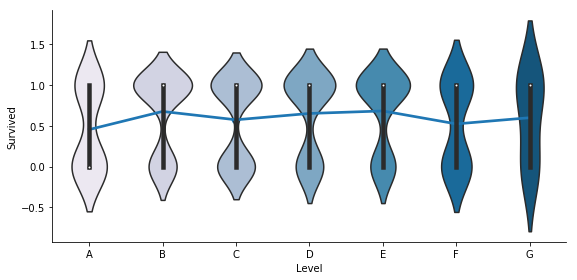

In [8]:
#a~fを文字に変換
cabin_df = df.dropna(subset=['Cabin'])
deck = df['Cabin'].dropna()
levels = []
# 1文字目を取り出します。
for level in deck:
    levels.append(level[0])    

# DataFrameを作って、プロットします。
cabin_df['Level'] =levels
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Level','Survived',data=cabin_df, order=['A','B','C','D','E','F','G'], aspect=2)
sns.violinplot('Level','Survived',data=cabin_df, order=['A','B','C','D','E','F','G'], aspect=2, palette='PuBu')


In [9]:
#チケットわよくわからないから削除
df = df.drop('Ticket',axis=1)

In [10]:
#運賃の対数を取る
prices =df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

df['Price'] =prices

In [11]:
#どっちが使えるかな
#df = df.drop('Fare',axis=1)
#df = df.drop('Price',axis=1)

In [12]:
#独り身か否か
df['Group'] =  df.Parch + df.SibSp

In [13]:
#称号で判断
title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(title)

df["Title"] = df["Title"].replace(['the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms":1, "Mme":1, "Mlle":1, "Lady":1, "Mrs":2, "Mr":3, "Rare":4})
df["Title"] = df["Title"].astype('int')

In [14]:
df.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Em_C,Em_Q,Sex_male,Price,Group,Title
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0,0,0,1,1.981001,1,3
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,0,0,4.266662,1,2
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1,0,0,0,2.070022,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,0,0,0,3.972177,1,2
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,0,1,2.085672,0,3


In [15]:
#家族は多分一緒に行動するはず
survive_array = df.Survived
surname=[]
sn_count=[]
sn_s_c=[]
sn_s_r=[]
s_r=[]
name_i =0
for i in df.Name:
    if i.split(",")[0] in surname:
        sn_count[surname.index(i.split(",")[0])] = sn_count[surname.index(i.split(",")[0])]+1
        sn_s_c[surname.index(i.split(",")[0])] = sn_s_c[surname.index(i.split(",")[0])]+survive_array[name_i]
    else:
        surname.append(i.split(",")[0])
        sn_count.append(1)
        sn_s_c.append(survive_array[name_i])
    name_i=name_i+1

count = 0
for i in sn_count:
    if sn_count[count] == 1:
        sn_s_r.append(0)
    else:
        sn_s_r.append(sn_s_c[count]/(sn_count[count]))
    count = count + 1

for i in df["Name"]:    
    s_r.append(sn_s_r[surname.index(i.split(",")[0])])
    
df['Family'] =s_r
df

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Em_C,Em_Q,Sex_male,Price,Group,Title,Family
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0,0,0,1,1.981001,1,3,0.000000
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,0,0,4.266662,1,2,0.500000
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1,0,0,0,2.070022,0,1,0.000000
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,0,0,0,3.972177,1,2,0.500000
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,0,1,2.085672,0,3,0.500000
5,28.0,NaN,8.4583,"Moran, Mr. James",0,6,3,0,0,0,1,1,2.135148,0,3,0.333333
6,54.0,E46,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0,0,0,1,3.948596,0,3,0.500000
7,2.0,NaN,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,3,0,0,0,1,3.048088,4,0,0.000000
8,27.0,NaN,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,1,0,0,0,2.409941,2,2,0.500000
9,14.0,NaN,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1,0,0,3.403555,1,2,0.500000


In [16]:
#'Name','Cabin'はもうグッバイ
df = df.drop('Name',axis=1)
df = df.drop('Cabin',axis=1)

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [18]:
X_train = pd.DataFrame(df[:len(df1)])
X_test = pd.DataFrame(df[len(df1):])
pi=X_test.PassengerId
Y_train = pd.Series(X_train["Survived"])
Y_test = pd.Series(X_test["Survived"])
X_train.drop(labels=["Survived","PassengerId"], axis=1, inplace=True)

X_test.drop(labels=["Survived","PassengerId"], axis=1, inplace=True)

X_train.head()

,Age,Fare,Parch,Pclass,SibSp,Em_C,Em_Q,Sex_male,Price,Group,Title,Family
0,22.0,7.2500,0,3,1,0,0,1,1.981001,1,3,0.0
1,38.0,71.2833,0,1,1,1,0,0,4.266662,1,2,0.5
2,26.0,7.9250,0,3,0,0,0,0,2.070022,0,1,0.0
3,35.0,53.1000,0,1,1,0,0,0,3.972177,1,2,0.5
4,35.0,8.0500,0,3,0,0,0,1,2.085672,0,3,0.5


In [19]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
from sklearn import metrics
Y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.937799043062


best=0.937799043062

In [21]:
from sklearn import svm
from sklearn.svm import SVC
C = 1.0  
model = svm.SVC(kernel='linear', C=C)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected,predicted))

0.956937799043


In [22]:
C = 1.0  
model2 = svm.LinearSVC(C=C)
model2.fit(X_train,Y_train)
predicted = model2.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected,predicted))

0.626794258373


In [29]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
predicted3 = model3.predict(X_test)
expected3 = Y_test
print(metrics.accuracy_score(expected3, predicted3))

0.875598086124


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

RFC = RandomForestClassifier()
RF_Param_Grid = {
    "max_depth": [4,8,16,32],
    "min_samples_split": [2,4,8,16],
    "min_samples_leaf": [1,3],
    "bootstrap": [False],
    "n_estimators": [50,100],
    "criterion": ["gini"]
}
kfold = StratifiedKFold(n_splits=10)

g_clf = GridSearchCV(RFC, param_grid=RF_Param_Grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)
g_clf.fit(X_train, Y_train)
bp = g_clf.best_params_

clf = RandomForestClassifier(
    bootstrap=bp["bootstrap"], 
    criterion=bp["criterion"], 
    max_depth=bp["max_depth"], 
    min_samples_leaf=bp["min_samples_leaf"], 
    min_samples_split=bp["min_samples_split"], 
    n_estimators=bp["n_estimators"]
)
clf.fit(X_train, Y_train)
predicted4 = clf.predict(X_test)
expected4 = Y_test
print(metrics.accuracy_score(expected4, predicted4))

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   29.3s
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:   41.9s finished


0.928229665072


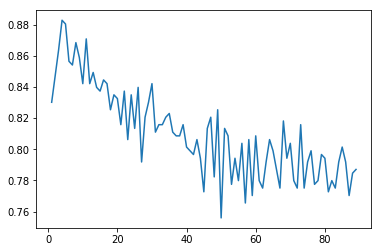

In [52]:
from sklearn.ensemble import RandomForestRegressor

r_range = range(1, 90)
accuracy1 = []
for r in r_range:
    rfr = RandomForestRegressor(n_estimators=r)
    rfr.fit(X_train, Y_train)
    yfit = rfr.predict(X_test).astype(int)
    accuracy1.append(metrics.accuracy_score(Y_test, yfit))
plt.plot(r_range, accuracy1)

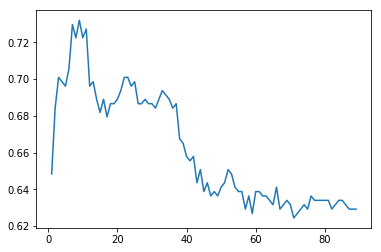

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)

k_range = range(1, 90)
accuracy = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
plt.plot(k_range, accuracy)

In [25]:
import csv as csv
submit_file = open("titanic_submit2.csv", "w")
file_object = csv.writer(submit_file)
file_object.writerow(["PassengerId", "Survived"])
file_object.writerows(zip(pi.values, Y_pred))
submit_file.close()